# K-Means Clustering

### Content:
- Elbow Technique
- K-Prototype Algorithm
- Plotting the Clusters
- Descriptive Statistics
- Merge Cluster Column Back to Original Data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from plotly import graph_objects as go
import os
from kmodes.kprototypes import KPrototypes
import pylab as pl

from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
#display all visualizations
%matplotlib inline

In [3]:
#import data
path = '/Users/kimballwightman/Documents/CareerFoundry/Used Car Listings Analysis/'

In [4]:
df_cars = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','cars_residual.csv'), index_col = [0])

In [5]:
df_cars.head()

,Price,Year,Mileage,City,State,Vin,Make,Model,make_model,predicted,residual
0,8995.0,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed,Acura ILX6-Speed,16180.941993,-7185.941993
1,10888.0,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed,Acura ILX5-Speed,16155.395900,-5267.395900
2,8995.0,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed,Acura ILX6-Speed,13823.340101,-4828.340101
3,10999.0,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed,Acura ILX5-Speed,16316.240218,-5317.240218
4,14799.0,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic,Acura ILXAutomatic,21332.265154,-6533.265154


### Elbow Technique

We'd like to use the K-Means algorithm here, but we want to find patterns in the relationship between residual and Make, or residual and Model. Since the K-Means algorithm doesn't work with categorical variables like Make or Model, it's not appropriate for our analysis. Instead, there's another algorithm called KPrototypes that deals with both numerical and categorical variables in a dataset. 

In [6]:
#create dataframe for KPrototypes clustering
df_cluster_1 = df_cars.drop(columns = ['Price','Year','Mileage','City','State','Vin','Model','predicted','Make'])
df_cluster_2 = df_cars.drop(columns = ['Price','Year','Mileage','City','State','Vin','Model','predicted','make_model'])

In [7]:
df_cluster_1.head()

,make_model,residual
0,Acura ILX6-Speed,-7185.941993
1,Acura ILX5-Speed,-5267.395900
2,Acura ILX6-Speed,-4828.340101
3,Acura ILX5-Speed,-5317.240218
4,Acura ILXAutomatic,-6533.265154


In [8]:
df_cluster_2.head()

,Make,residual
0,Acura,-7185.941993
1,Acura,-5267.395900
2,Acura,-4828.340101
3,Acura,-5317.240218
4,Acura,-6533.265154


In [9]:
#use the elbow technique to determine the optimal number of clusters, for residual and Make
costs = []
n_clusters = []

for i in tqdm(range(1,10)):
    try:
        kproto = KPrototypes(n_clusters=i)
        clusters = kproto.fit_predict(df_cluster_1, categorical=[0])
        costs.append(kproto.cost_)
        n_clusters.append(i)
    except:
        print(f"Can't cluster with {i} clusters")

  0%|          | 0/9 [00:00<?, ?it/s]

Can't cluster with 9 clusters


In [ ]:
#plot the elbow curve
fig = go.Figure(data=go.Scatter(x=n_clusters, y=costs))
fig.show()

There appears to be a subtle kink point in the curve at 3 clusters. So for our k-means algorithm, we'll use 3 clusters as the optimal number of clusters.

In [ ]:
#residual and Model
costs = []
n_clusters = []

for i in tqdm(range(1,10)):
    try:
        kproto = KPrototypes(n_clusters=i)
        clusters = kproto.fit_predict(df_cluster_2, categorical=[0])
        costs.append(kproto.cost_)
        n_clusters.append(i)
    except:
        print(f"Can't cluster with {i} clusters")

In [ ]:
fig = go.Figure(data=go.Scatter(x=n_clusters, y=costs))
fig.show()

### K-Prototype Algorithm

In [23]:
#run kproto algo with optimal number of clusters for residual, Make
kproto = KPrototypes(n_clusters = 3, n_jobs = -1)

In [24]:
#fit the kproto object to our data
kproto.fit(df_cluster_1, categorical = [0])

/Users/kimballwightman/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [25]:
#column for which cluster the observation belongs to
df_cluster_1['clusters'] = kproto.fit_predict(df_cluster_1, categorical = [0])

/Users/kimballwightman/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [26]:
df_cluster_1.head()

,Year,Mileage,price_score,clusters
0,2014,35725,3.693389,0
1,2013,19606,4.678813,0
2,2013,48851,3.693389,0
3,2014,39922,4.736596,0
4,2016,22142,6.714732,0


In [27]:
df_cluster_1['clusters'].value_counts()

0    545655
1    229158
2     77221
Name: clusters, dtype: int64

In [ ]:
#repeat for residual, Model
kproto_2 = KPrototypes(n_clusters = 3, n_jobs = -1)

In [ ]:
kproto_2.fit(df_cluster_2, categorical = [0])

In [ ]:
df_cluster_2['clusters'] = kproto_2.fit_predict(df_cluster_2, categorical = [0])

In [ ]:
df_cluster_2.head()

In [ ]:
df_cluster_2['clusters'].value_counts()

### Plotting the Clusters

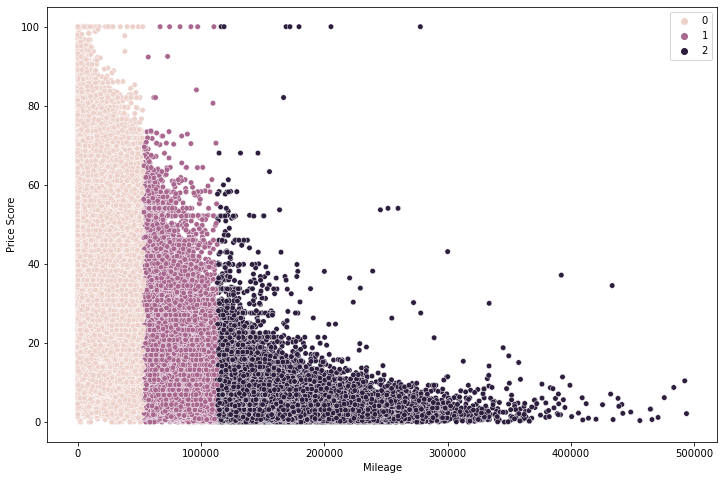

In [28]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['Mileage'], y=df_cluster['price_score'], hue=kmeans.labels_, s=30) 
ax.grid(False)
plt.xlabel('Mileage')
plt.ylabel('Price Score')
plt.show()

A lot of these clusters might be overlapping, we need to get a better picture of each one individually.

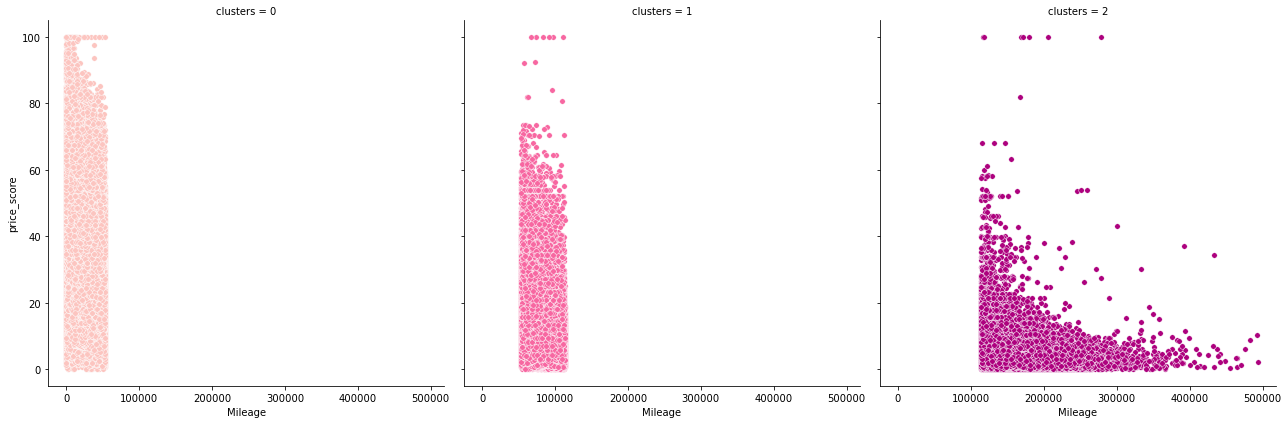

In [29]:
#scatterplots of of each individual cluster
g = sns.FacetGrid(df_cluster, col='clusters', hue='clusters', palette='RdPu', height = 6)
g.map(sns.scatterplot, 'Mileage', 'price_score', s=30)

Note the following: 
- A high price score represents a car that has a high price compared to other cars listed with the same make.
- A high mileage score represents a car with a high mileage.

There are two clusters that follow expected behavior given the relationship between price and mileage. The regular purple cluster groups cars with low milage and high price for its make, while the dark pink cluster groups cars with high mileage and low price for its make. 

The other two slightly deviate from the linear relationship we would expect; the light pink cluster groups cars with a very low mileage score, but maintain a low price relative to its make. The dark purple cluster follows the same as the light pink, but with a bit higher of a mileage score.

One thing to note here is that three of the clusters all seem to cap their price score around 30. Where they end is where the regular purple cluster begins, with price scores of 30 or higher. 

/Users/kimballwightman/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


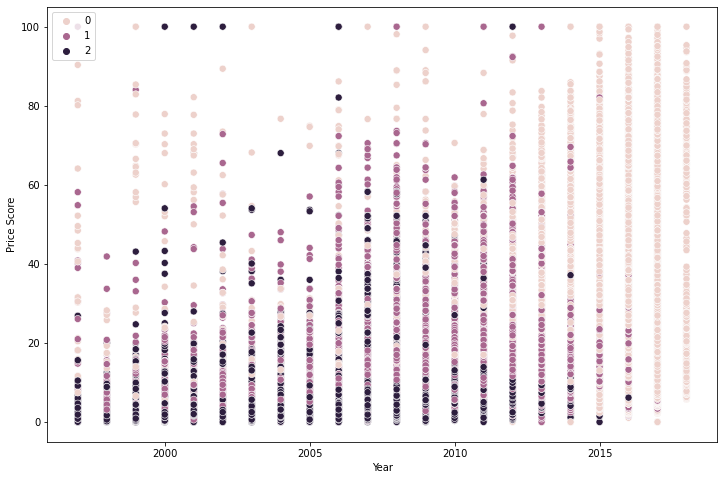

In [30]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['Year'], y=df_cluster['price_score'], hue=kmeans.labels_, s=50) 
ax.grid(False)
plt.xlabel('Year')
plt.ylabel('Price Score')
plt.show()

Year score seems to demonstrate very similar characteristics as mileage score, with groupings following similar patterns. 

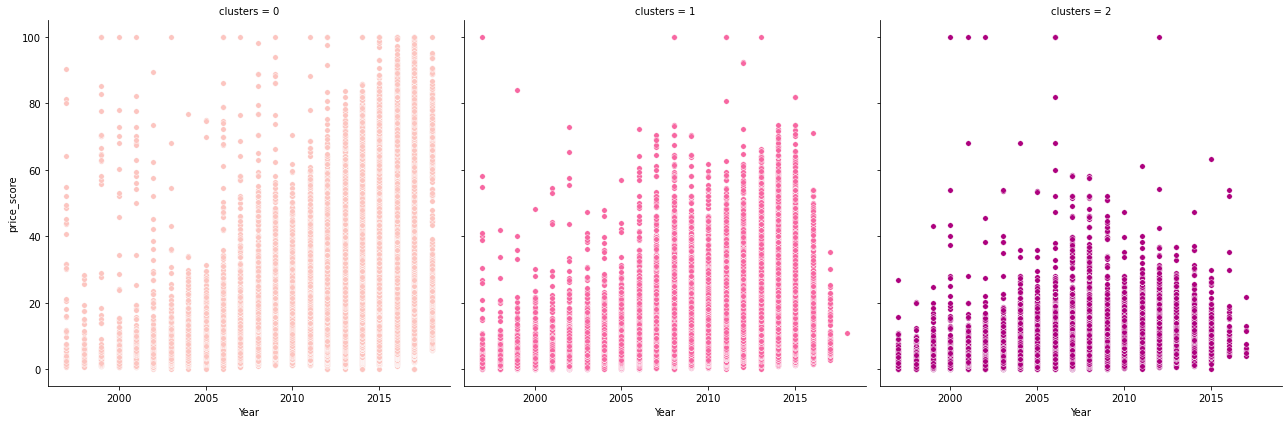

In [31]:
#scatterplots of of each individual cluster
g = sns.FacetGrid(df_cluster, col='clusters', hue='clusters', palette='RdPu', height = 6)
g.map(sns.scatterplot, 'Year', 'price_score', s=30)

### Descriptive Statistics

In [32]:
#descriptive statistics for clusters
df_cluster.loc[df_cluster['clusters'] == 0, 'cluster'] = 'light pink'
df_cluster.loc[df_cluster['clusters'] == 1, 'cluster'] = 'purple'
df_cluster.loc[df_cluster['clusters'] == 2, 'cluster'] = 'dark purple'

In [33]:
df_cluster.groupby('cluster').agg({'Mileage':['mean', 'median'], 
                         'Year':['mean', 'median'], 
                         'price_score':['mean', 'median']})

Mileage                   Year         price_score  \
                      mean    median         mean  median        mean   
cluster                                                                 
dark purple  147388.071716  137677.0  2007.118128  2007.0    4.634355   
light pink    27897.040965   28693.0  2014.993958  2015.0   14.583770   
purple        78893.385014   77111.0  2011.310367  2012.0    8.836357   

                        
                median  
cluster                 
dark purple   3.566764  
light pink   10.875692  
purple        6.855277

Note: a high year score demonstrates a newer car.

- The pink cluster has the newest cars.
- The purple cluster is the most expensive when compared to other cars of their own make.

The results we found for these four groups could be useful in helping us identify the types of cars we can find within a make. If we did further analysis by car model, we might be able to sort each model into one of these 4 car types. This would help us understand what different models of a make are valued for, whether for luxury, practicality, etc.

### Merge Cluster Column Back to Original Data

In [34]:
#merge df_cluster back onto original data set to get the clusters column
df_merge = pd.merge(df_cars, df_cluster, on=['Mileage','Year','price_score'], indicator = True)

In [35]:
df_merge.head()

,Price,Year,Mileage,City,State,Make,Model,price_score,clusters,cluster,_merge
0,8995,2014,35725,El Paso,TX,Acura,ILX6-Speed,3.693389,0,light pink,both
1,10888,2013,19606,Long Island City,NY,Acura,ILX5-Speed,4.678813,0,light pink,both
2,8995,2013,48851,El Paso,TX,Acura,ILX6-Speed,3.693389,0,light pink,both
3,10999,2014,39922,Windsor,CO,Acura,ILX5-Speed,4.736596,0,light pink,both
4,14799,2016,22142,Lindon,UT,Acura,ILXAutomatic,6.714732,0,light pink,both


In [36]:
df_merge = df_merge.drop(columns = ['_merge'])

In [37]:
df_merge.head()

,Price,Year,Mileage,City,State,Make,Model,price_score,clusters,cluster
0,8995,2014,35725,El Paso,TX,Acura,ILX6-Speed,3.693389,0,light pink
1,10888,2013,19606,Long Island City,NY,Acura,ILX5-Speed,4.678813,0,light pink
2,8995,2013,48851,El Paso,TX,Acura,ILX6-Speed,3.693389,0,light pink
3,10999,2014,39922,Windsor,CO,Acura,ILX5-Speed,4.736596,0,light pink
4,14799,2016,22142,Lindon,UT,Acura,ILXAutomatic,6.714732,0,light pink


In [38]:
#export combined data
df_merge.to_csv(os.path.join(path,'02 Data','Prepared Data','cars_clusters.csv'))

### Searching for Patterns

In [39]:
#what patterns might emerge if we look at the car make and model found in each cluster?
df_merge['make_model'] = df_merge['Make']+' '+ df_merge['Model']

In [40]:
df_merge.head()

,Price,Year,Mileage,City,State,Make,Model,price_score,clusters,cluster,make_model
0,8995,2014,35725,El Paso,TX,Acura,ILX6-Speed,3.693389,0,light pink,Acura ILX6-Speed
1,10888,2013,19606,Long Island City,NY,Acura,ILX5-Speed,4.678813,0,light pink,Acura ILX5-Speed
2,8995,2013,48851,El Paso,TX,Acura,ILX6-Speed,3.693389,0,light pink,Acura ILX6-Speed
3,10999,2014,39922,Windsor,CO,Acura,ILX5-Speed,4.736596,0,light pink,Acura ILX5-Speed
4,14799,2016,22142,Lindon,UT,Acura,ILXAutomatic,6.714732,0,light pink,Acura ILXAutomatic


In [83]:
crosstab_make = pd.crosstab(df_merge['Make'], df_merge['cluster'], dropna = False)

In [84]:
crosstab_make

cluster,dark purple,light pink,purple
Make,,,
AM,2,7,10
Acura,1448,6852,2969
Alfa,0,44,0
Aston,0,143,6
Audi,618,8349,3771
BMW,1823,21595,9023
Bentley,0,323,44
Buick,900,8322,3323
Cadillac,1216,10266,4041


In [86]:
crosstab_make_model = pd.crosstab(df_merge['make_model'], df_merge['cluster'], dropna = False)

pd.options.display.max_rows = None
crosstab_make_model

cluster,dark purple,light pink,purple
make_model,,,
AM General,2,7,10
Acura CLAutomatic,4,0,2
Acura CLManual,2,0,0
Acura CLType-S,15,0,4
Acura ILX4dr,0,1,0
Acura ILX5-Speed,2,575,83
Acura ILX6-Speed,0,16,3
Acura ILXAcuraWatch,0,7,0
Acura ILXAutomatic,0,187,2


In [90]:
df_cl_2['Mileage'].max()

113214

In [93]:
df_merge[df_merge['Model']=='XF35t']

,Price,Year,Mileage,City,State,Make,Model,price_score,clusters,cluster,make_model
480795,29571,2017,10,Woods Cross,UT,Jaguar,XF35t,5.893590,0,light pink,Jaguar XF35t
480796,29571,2017,24,Woods Cross,UT,Jaguar,XF35t,5.893590,0,light pink,Jaguar XF35t
480926,32251,2017,1192,Woods Cross,UT,Jaguar,XF35t,6.466261,0,light pink,Jaguar XF35t
480945,29999,2016,24828,Miami,FL,Jaguar,XF35t,5.985046,0,light pink,Jaguar XF35t
481044,33988,2016,12182,Miami,FL,Jaguar,XF35t,6.837428,0,light pink,Jaguar XF35t
481052,32851,2016,23113,Fort Pierce,FL,Jaguar,XF35t,6.594470,0,light pink,Jaguar XF35t
481104,34990,2016,16642,Sarasota,FL,Jaguar,XF35t,7.051538,0,light pink,Jaguar XF35t
481105,34888,2016,4233,Richardson,TX,Jaguar,XF35t,7.029743,0,light pink,Jaguar XF35t
481118,35888,2016,3721,Metairie,LA,Jaguar,XF35t,7.243426,0,light pink,Jaguar XF35t
481121,35995,2017,9631,Tampa,FL,Jaguar,XF35t,7.266290,0,light pink,Jaguar XF35t
